In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Importing the Titanic dataset to pandas
df = pd.read_csv(r'C:\Users\hp\Downloads\Kaggle\Datasets\Titanic\train.csv')
test_df = pd.read_csv(r'C:\Users\hp\Downloads\Kaggle\Datasets\Titanic\test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Understanding the data :

In [78]:
print('Shape of the train data : ', df.shape)

Shape of the train data :  (891, 12)


In [79]:
print('Shape of the test data : ', test_df.shape)

Shape of the test data :  (418, 11)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# datatypes of the datasets :

Name, Sex, Ticket, Cabin, Embarked - Object (catogoriacal)         
PassengerId, PassengerId, Pclass, SibSp, Parch - int64
Age, Fare - float64

Survived - output or dependent variable.

# Removing unwanted variables from the dataset :

PassengerId, Name, Ticket, Fare are not realated for the survival of the people. So let me drop them.

In [81]:
# Droping unwanted features in train and test data sets :

temp_df = test_df['PassengerId']
df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [83]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,34.5,0,0,NaN,Q
1,3,female,47.0,1,0,NaN,S
2,2,male,62.0,0,0,NaN,Q
3,3,male,27.0,0,0,NaN,S
4,3,female,22.0,1,1,NaN,S


In [84]:
df.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,G6,S
freq,NaN,NaN,577,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,NaN


In [85]:
print('There are {} total null values in the train dataset' .format(df.isna().sum().sum()))

There are 866 total null values in the train dataset


In [86]:
test_df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Cabin       327
Embarked      0
dtype: int64

In [87]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
dtype: int64

#No.of null values for every variable in the train dataset :

Age - 177

Cabin - 687

Embarked - 2

#No.of null values for every variable in the test dataset :

Age - 86

Cabin - 327

In [88]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F33            3
              ..
A24            1
A19            1
E36            1
B4             1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [89]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

Maximum number of cabin has null values(more than 70%), as we cant replace them with mode, I decided to drop that column also.

In [90]:
# Droping "Cabin" column in both train and test datasets :

df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Cabin', axis = 1, inplace = True)

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [92]:
test_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q


In [93]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
df.Embarked.mode()

0    S
dtype: object

Either we can delete the whole records or replace 'Embarked' null values with the mode value.
I think "Embarked" variable has much effect on surival varible. So, I decided to delete the rows.

In [95]:
# Deleting the two null valued rows of "Embarked" column :

df.drop(df[df['Embarked'].isna()].index, inplace = True)

In [96]:
df.shape

(889, 7)

In [97]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [98]:
#df.Age

In [99]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.626168,38.105543,0.420561,0.359813
2,0.472826,29.877630,0.402174,0.380435
3,0.242363,25.140620,0.615071,0.393075


In [100]:
def fillnullvals(col):
    Age = col[0]
    Pclass = col[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return float(38)
        elif Pclass == 2:
            return float(29)
        else:
            return float(25)
    else:
        return Age

In [101]:
# filling null values in both train and test datasets :

df['Age'] = df[['Age', 'Pclass']].apply(fillnullvals, axis = 1)
test_df['Age'] = test_df[['Age', 'Pclass']].apply(fillnullvals, axis = 1)
print('Total no.of null values in train dataset after filling "na" values : ', df.isnull().sum().sum())
print('Total no.of null values in test dataset after filling "na" values : ', test_df.isnull().sum().sum())

Total no.of null values in train dataset after filling "na" values :  0
Total no.of null values in test dataset after filling "na" values :  0


In [102]:
# importing "train_test_split" :

from sklearn.model_selection import train_test_split
y = df.Survived
X = df.drop(['Survived'], axis = 1)

In [103]:
# Spliting the data into train and test data frames :

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [104]:
# Shapes of the train and test data frames :

print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('----------------------------------------')
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (711, 6)
X_test shape :  (178, 6)
----------------------------------------
y_train shape :  (711,)
y_test shape :  (178,)


In [105]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
847,3,male,35.0,0,0,C
792,3,female,25.0,8,2,S
23,1,male,28.0,0,0,S
98,2,female,34.0,0,1,S
9,2,female,14.0,1,0,C


In [106]:
# import LabelEncoder :

from sklearn.preprocessing import LabelEncoder

In [107]:
# Instantiating LabelEncoder :

le = LabelEncoder()

In [108]:
X_train.loc[:, 'Sex'] = le.fit_transform(X_train.loc[:, 'Sex'])
X_test.loc[:, 'Sex'] = le.transform(X_test.loc[:, 'Sex'])
# Label encoding for different test data :
test_df.loc[:, 'Sex'] = le.transform(test_df.loc[:, 'Sex'])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [109]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
864,2,1,24.0,0,0,S
380,1,0,42.0,0,0,C
724,1,1,27.0,1,0,S
756,3,1,28.0,0,0,S
504,1,0,16.0,0,0,S


In [110]:
X_train.loc[:, 'Embarked'] = le.fit_transform(X_train.loc[:, 'Embarked'])
X_test.loc[:, 'Embarked'] = le.transform(X_test.loc[:, 'Embarked'])
# Label encoding for different test data :
test_df.loc[:, 'Embarked'] = le.transform(test_df.loc[:, 'Embarked'])

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [111]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [112]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
847,3,1,35.0,0,0,0
792,3,0,25.0,8,2,2
23,1,1,28.0,0,0,2
98,2,0,34.0,0,1,2
9,2,0,14.0,1,0,0


In [113]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2


In [114]:
X_train.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
dtype: object

In [115]:
#X_train

In [116]:
#X_test

In [117]:
# import LogisticRegression :

from sklearn.linear_model import LogisticRegression

In [118]:
model_lg = LogisticRegression()

In [119]:
model_lg.fit(X_train, y_train)

LogisticRegression()

In [120]:
y_pred = model_lg.predict(X_test)

In [121]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [122]:
model_lg.coef_

array([[-1.09021653, -2.66085163, -0.03483681, -0.26649286, -0.10859965,
        -0.23778775]])

In [123]:
model_lg.intercept_

array([5.23176051])

In [124]:
X_train.corr()

,Pclass,Sex,Age,SibSp,Parch,Embarked
Pclass,1.000000,0.137262,-0.411373,0.078443,0.009017,0.167603
Sex,0.137262,1.000000,0.099984,-0.130716,-0.252168,0.088737
Age,-0.411373,0.099984,1.000000,-0.220118,-0.172296,-0.016387
SibSp,0.078443,-0.130716,-0.220118,1.000000,0.402981,0.075483
Parch,0.009017,-0.252168,-0.172296,0.402981,1.000000,0.032911
Embarked,0.167603,0.088737,-0.016387,0.075483,0.032911,1.000000


In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
print('Accuaracy score : ', accuracy_score(y_test, y_pred))

Accuaracy score :  0.8258426966292135


In [127]:
print('Confusion matrix :\n', confusion_matrix(y_test, y_pred))

Confusion matrix :
 [[111  15]
 [ 16  36]]


In [128]:
print('Classification report :\n', classification_report(y_test, y_pred))

Classification report :
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       126
           1       0.71      0.69      0.70        52

    accuracy                           0.83       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.82      0.83      0.83       178



In [129]:
# Trying RandomForestClassifier model :

from sklearn.ensemble import RandomForestClassifier

In [130]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [131]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=1)

In [132]:
y_pred1 = rfc.predict(X_test)

In [133]:
y_pred1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [134]:
accuracy_score(y_test, y_pred1)

0.8258426966292135

In [135]:
confusion_matrix(y_test, y_pred1)

array([[112,  14],
       [ 17,  35]], dtype=int64)

In [136]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       126
           1       0.71      0.67      0.69        52

    accuracy                           0.83       178
   macro avg       0.79      0.78      0.79       178
weighted avg       0.82      0.83      0.82       178



Tried with RandoForestClassifier also along with LogisticRegression, but I got same accuracy.

In [137]:
print("Important features :")
rfc.feature_importances_

Important features :


array([0.12432464, 0.32720093, 0.37185119, 0.07614645, 0.0549935 ,
       0.04548329])

In [138]:
feature_imp_df = pd.DataFrame({'columns' : X_train.columns, 'feature_importance' : rfc.feature_importances_}).sort_values(by = 'feature_importance', ascending = True)
feature_imp_df

,columns,feature_importance
5,Embarked,0.045483
4,Parch,0.054993
3,SibSp,0.076146
0,Pclass,0.124325
1,Sex,0.327201
2,Age,0.371851


<BarContainer object of 6 artists>

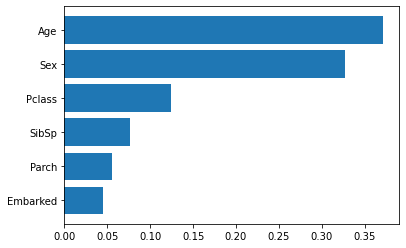

In [139]:
plt.barh(feature_imp_df['columns'], feature_imp_df['feature_importance'])

# Predicting for test data:

In [140]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [141]:
y_test_pred = rfc.predict(test_df)

In [142]:
y_test_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [143]:
temp_df

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [144]:
test_y_pred_vals = pd.DataFrame({'PassengerId' : temp_df, 'Survived' : y_test_pred})

In [145]:
test_y_pred_vals.to_csv(r'C:\Users\hp\Downloads\Kaggle\Datasets\Titanic\Titanic_prediction_for_test_data1.csv', index = False)

In [146]:
test_y_pred_vals

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# The End